In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from IPython.display import Image
import copy
import warnings
warnings.simplefilter("ignore")
from IPython.display import display, HTML
import re
from scipy.stats import wilcoxon

class Figure:
    
    
    def __init__(self):
        
        self.d100 = ["aaaData_for_UCI_named",
                    "AirlinesCodrnaAdult",
                    "Amazon",
                    "analcatdata_authorship",
                    "AP_Breast_Lung",
                    "AP_Omentum_Ovary",
                    "AP_Prostate_Ovary",
                    "arrhythmia",
                    "audiology",
                    "avila-tr",
                    "churn",
                    "cifar-10",
                    "connect-4",
                    "CovPokElec",
                    "dataset_183_adult",
                    "dataset_185_yeast",
                    "dataset_186_satimage",
                    "dataset_187_abalone",
                    "dataset_189_baseball",
                    "dataset_194_eucalyptus",
                    "dataset_24_mushroom",
                    "dataset_26_nursery",
                    "dataset_28_optdigits",
                    "dataset_31_credit-g",
                    "dataset_36_segment",
                    "dataset_39_ecoli",
                    "dataset_40_sonar",
                    "dataset_42_soybean",
                    "dataset_44_spambase",
                    "dataset_54_vehicle",
                    "dataset_59_ionosphere",
                    "dataset_6_letter",
                    "dataset_60_waveform-5000",
                    "dataset_61_iris",
                    "dataset_9_autos",
                    "devnagari",
                    "electricity-normalized",
                    "eye_movements",
                    "GCM",
                    "gina_agnostic",
                    "hiva_agnostic",
                    "ipums_la_99-small",
                    "jm1",
                    "jungle_chess_2pcs_endgame_panther_lion",
                    "KDDCup99",
                    "kin8nm",
                    "leukemia",
                    "lymphoma_2classes",
                    "MagicTelescope",
                    "mfeat-pixel",
                    "mnist_784",
                    "openml_phpJNxH0q",
                    "page-blocks",
                    "php0FyS2T",
                    "php3CTpvq",
                    "php5OMDBD",
                    "php5s7Ep8",
                    "php7KLval",
                    "phpB0xrNj",
                    "phpbL6t4U",
                    "phpchCuL5",
                    "phpCsX3fx",
                    "phpdo58hj",
                    "phpdReP6S",
                    "phpEZ030X",
                    "phpfLuQE4",
                    "phpfrJpBS",
                    "phpGReJjU",
                    "phpGUrE90",
                    "phphQEck0",
                    "phpHyLSNF",
                    "phpkIxskf",
                    "phpmcGu2X",
                    "phpmPOD5A",
                    "phpn1jVwe",
                    "phpN4gaxw",
                    "phpNevWWL",
                    "phpoOxxNn",
                    "phpoW7Dbi",
                    "phpPbCMyg",
                    "phprAeXmK",
                    "phpSZJq5T",
                    "phptd5jYj",
                    "phpTJRsqa",
                    "phpvcoG8S",
                    "phpVeNa5j",
                    "phpvtdNPU",
                    "phpWfYmlu",
                    "phpxijhaP",
                    "phpYLeydd",
                    "phpZrCzJR",
                    "pokerhand-normalized",
                    "schizo",
                    "shuttle",
                    "solar-flare_1",
                    "synthetic_control",
                    "tumors_C",
                    "umistfacescropped",
                    "vowel",
                    "wine-quality-red"]
        
        
        skout=r"./../logs_search_space/skout.xlsx"
        self.skout = pd.read_excel(skout,
                              na_values=['', 'NA', 'NAN', 'NaN', 'Nan', 'NA\n', 'None'])
        self.skout = self.skout[['dataset', 'time_budget', 'methods', 'accuracy']]
        self.skout.methods = self.skout.methods.replace("['adaboost', 'bernoulli_nb', 'decision_tree', 'extra_trees', 'gaussian_nb', 'gradient_boosting', 'k_nearest_neighbors', 'lda', 'liblinear_svc', 'libsvm_svc', 'multinomial_nb', 'passive_aggressive', 'qda', 'random_forest', 'sgd']", "fc")
        self.skout.methods = self.skout.methods.replace("['decision_tree', 'libsvm_svc', 'random_forest']", "3c")
#         self.skout.methods = self.skout.methods.replace("['libsvm_svc']", "1c")
#         self.skout.methods = self.skout.methods.replace("['decision_tree']", "1c")
#         self.skout.methods = self.skout.methods.replace("['random_forest']", "1c")
        self.skout = self.clean(self.skout)
        
        atm=r"./../logs_search_space/atmout.xlsx"
        self.atm = pd.read_excel(atm,
                              na_values=['', 'NA', 'NAN', 'NaN', 'Nan', 'NA\n', 'None'])
        self.atm = self.atm[['dataset', 'time_budget', 'methods', 'accuracy']]
        self.atm.methods = self.atm.methods.replace("['logreg', 'svm', 'sgd', 'dt', 'et', 'rf', 'gnb', 'mnb', 'bnb', 'gp', 'pa', 'knn', 'mlp', 'ada']", "fc")
        self.atm.methods = self.atm.methods.replace("['rf', 'dt', 'svm']", "3c")
        self.atm.methods = self.atm.methods.replace("['logreg', 'dt', 'knn']", "def")
#         self.atm.methods = self.atm.methods.replace("['svm']", "1c")
#         self.atm.methods = self.atm.methods.replace("['dt']", "1c")
#         self.atm.methods = self.atm.methods.replace("['rf']", "1c")
        self.atm = self.clean(self.atm)
        
        tpot=r"./../logs_search_space/tpot.xlsx"
        self.tpot = pd.read_excel(tpot,
                              na_values=['', 'NA', 'NAN', 'NaN', 'Nan', 'NA\n', 'None'])
        self.tpot = self.tpot[['dataset', 'time_budget', 'methods', 'accuracy']]
        self.tpot.methods = self.tpot.methods.replace("default", "fc")
        self.tpot.methods = self.tpot.methods.replace("3C", "3c")
#         self.tpot.methods = self.tpot.methods.replace("SVC", "1c")
#         self.tpot.methods = self.tpot.methods.replace("DT", "1c")
#         self.tpot.methods = self.tpot.methods.replace("RF", "1c")
        self.tpot = self.clean(self.tpot)
        
    
    
    def clean(self, df, is_ATM=False):
        df = df[(df.accuracy != 0) & (df.accuracy.notna())]
        df = df.drop_duplicates(subset=['dataset', 'time_budget', 'methods'])
        datasets = self.d100
        df = df[df.dataset.isin(datasets)]
        if is_ATM:
            sss = ['fc', '3c', 'def']
        else:
            sss = ['fc', '3c']
        for d in datasets:
            for t in [10, 30, 60]:
                for ss in sss:
                    if df[(df.methods == ss) & (df.time_budget == t) & (df.dataset == d)].shape[0] == 0:
                        new_row = {'dataset': d, 'time_budget': t, 'methods':ss, 'accuracy':0}
                        df = df.append(new_row, ignore_index=True)
        return df
    
    
    def get_sheet(self):
        return self.sheet
    
    def check(self):
        return pd.DataFrame({ 'diff': self.diff, 'va11': self.var1, 'var2': self.var2 })
    
    
    def compare_acc_scatter(self, var1, var2, x_label, y_label, title,
                           legend_missing='Failed Run', legend_negative='-ve Dif',
                           legend_zero='Zero Dif', legend_positive='+ve Dif',
                           fig_size = (8, 8), legend_ncols=4, legend_x_shift=0, y_limit=None,
                           x_axis_grid=False, divide_data=False):
       
        font_size=16
        self.var1, self.var2 = var1.reset_index(drop=True).fillna(0), var2.reset_index(drop=True).fillna(0)
        argsort = (self.var1 - self.var2).argsort()
        self.var1 = self.var1[argsort].reset_index(drop=True)
        self.var2 = self.var2[argsort].reset_index(drop=True)

        self.diff = (self.var1 - self.var2).reset_index(drop=True)
        y_limit = [1.1* min(self.diff), 1.1 * max(self.diff)]
        if y_limit[0] == 0:
            y_limit[0] = -0.1 * y_limit[1]
        fig, ax = plt.subplots(figsize=fig_size)

        dot_size=60
        yy = self.diff[(self.diff <= -0.01) & (self.var1 != 0.0) & (self.var2 != 0)]
        print('Average loss = {} from {} datasets'.format(round(100 * yy.mean(), 1), yy.size))
        ax.scatter(x=yy.index, 
               y=yy,
               color= 'red',
               marker ='v',
               label = 'Negative',
                  s=dot_size)

        yy = self.diff[(self.diff > -0.01) & (self.diff < 0.01) & (self.var1 != 0.0) & (self.var2 != 0)]
        print(' {} datasets have the same performance'.format(yy.size))
        ax.scatter(x=yy.index, 
               y=yy,
               color= 'blue',
               marker ='.',
               label = 'Same',
                  s=dot_size*1.5)

        yy = self.diff[(self.diff >= 0.01)  & (self.var1 != 0.0) & (self.var2 != 0)]
        print('Average gain = {} from {} datasets'.format(round(100 * yy.mean(), 1), yy.size))
        ax.scatter(x=yy.index, 
               y=yy,
               color= 'green',
               marker ='^',
               label = 'Positive',
                  s=dot_size)

        yy = self.diff[(self.var1 == 0.0) | (self.var2 == 0)]
        yy_right = self.diff[(self.var1 != 0.0) & (self.var2 == 0)]
        yy_left = self.diff[(self.var1 == 0.0) & (self.var2 != 0)]
        yy_mid = self.diff[(self.var1 == 0.0) & (self.var2 == 0)]
        print('{} datasets failed to run on the left side only'.format( yy_right.size))
        print('{} datasets failed to run on the right side only'.format( yy_left.size))
        print('{} datasets failed to run on the both sides'.format( yy_mid.size))
        ax.scatter(x=yy.index, 
               y=yy,
               color= 'darkorange',
               marker ='x',
               label = 'Failed',
                  s=dot_size)

        l = ax.legend( ncol=legend_ncols, bbox_to_anchor=(legend_x_shift, 1), loc='lower left', fontsize=font_size)
        
        plt.xlabel(x_label, fontsize=font_size*1.2)
        plt.ylabel(y_label, fontsize=font_size*1.2)
        ax.yaxis.grid() # horizontal lines
        if x_axis_grid:
            ax.xaxis.grid()
        plt.ylim(y_limit)
        plt.xlim([-1,1+self.var1.shape[0]])
        plt.xticks(np.arange(0, 1+self.var1.shape[0], 10), fontsize=font_size)
        plt.yticks(fontsize=font_size)
        plt.title(label = title, pad = 40, fontsize=font_size)
        plt.tight_layout()
        #plt.savefig('./search_space_figs/' + title.replace(' ', '_') + '.pdf', format='pdf')
        plt.savefig('./search_space_figs/' + re.sub(r'\W+', '', title) + '.pdf', format='pdf', bbox_inches = "tight")
        plt.show()
        return

    def calc_wilcoxon(self):
        result = pd.DataFrame(columns = ['Framework', 'Factor_1', 'Factor_2', 'Time_Budget', 'Avg_diff',
                                     'p_value', 'stat', 'Statistically_Better'])
        keys= ['skout', 'tpot', 'atm']
        for key in keys:
            df = getattr(self, key)
            data1 = df[(df.methods == 'fc') & (df.time_budget==30)].sort_values(by=['dataset']).accuracy.values
            data2 = df[(df.methods == '3c') & (df.time_budget==30)].sort_values(by=['dataset']).accuracy.values
            condition = (data1!=0) & (data2!=0)
            data1 = data1[condition]
            data2 = data2[condition]

            stat, p = wilcoxon(data1, data2)
            avg_diff = data1.mean() - data2.mean()
            if p <= 0.05:
                if avg_diff > 0:
                    better = '1'
                elif avg_diff < 0:
                    better = '2'
                else:
                    better = 'None'
            else:
                better = 'None'
            new_row = {'Framework': key, 'Factor_1': 'FC', 'Factor_2': '3C', 'Time_Budget':'30', 'Avg_diff': avg_diff,
                        'p_value': p, 'stat': stat, 'Statistically_Better': better}
            result = result.append(new_row, ignore_index=True)
        return result

In [2]:
fig = Figure()
fig.calc_wilcoxon().round(3)
#fig.skout[((fig.skout.time_budget==30) & (fig.skout.methods=='3c'))]

,Framework,Factor_1,Factor_2,Time_Budget,Avg_diff,p_value,stat,Statistically_Better
0,skout,FC,3C,30,-0.003,0.618,1967.0,None
1,tpot,FC,3C,30,0.026,0.001,141.0,1
2,atm,FC,3C,30,0.009,0.975,449.0,None


Average loss = -5.9 from 21 datasets
 50 datasets have the same performance
Average gain = 3.3 from 28 datasets
0 datasets failed to run on the left side only
0 datasets failed to run on the right side only
1 datasets failed to run on the both sides


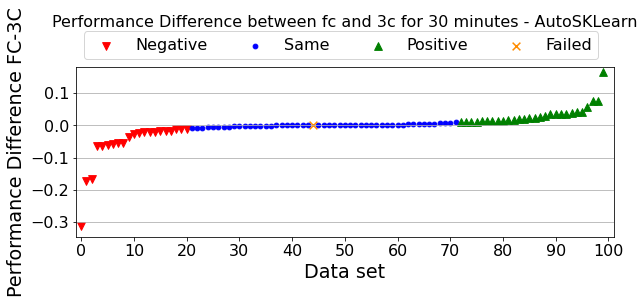

In [3]:
var1 = fig.skout[(fig.skout.methods == 'fc') & (fig.skout.time_budget==30)].sort_values(by=['dataset']).accuracy
var2 = fig.skout[(fig.skout.methods == '3c') & (fig.skout.time_budget==30)].sort_values(by=['dataset']).accuracy
fig.compare_acc_scatter(var1, var2, 'Data set', 'Performance Difference FC-3C', 'Performance Difference between fc and 3c for 30 minutes - AutoSKLearn', fig_size = (9, 4))

In [4]:
var1-var2

272   NaN
273   NaN
277   NaN
280   NaN
281   NaN
       ..
585   NaN
586   NaN
587   NaN
606   NaN
607   NaN
Name: accuracy, Length: 200, dtype: float64

Average loss = -8.8 from 4 datasets
 21 datasets have the same performance
Average gain = 7.3 from 20 datasets
23 datasets failed to run on the left side only
20 datasets failed to run on the right side only
12 datasets failed to run on the both sides


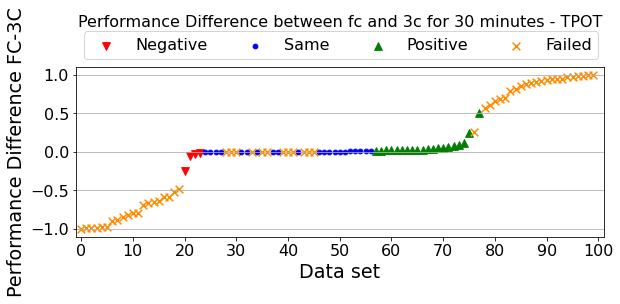

In [5]:
var1 = fig.tpot[(fig.tpot.methods == 'fc') & (fig.tpot.time_budget==30)].sort_values(by=['dataset']).accuracy
var2 = fig.tpot[(fig.tpot.methods == '3c') & (fig.tpot.time_budget==30)].sort_values(by=['dataset']).accuracy
fig.compare_acc_scatter(var1, var2, 'Data set', 'Performance Difference FC-3C', 'Performance Difference between fc and 3c for 30 minutes - TPOT', fig_size = (9, 4))

Average loss = -3.9 from 14 datasets
 27 datasets have the same performance
Average gain = 8.1 from 13 datasets
19 datasets failed to run on the left side only
10 datasets failed to run on the right side only
17 datasets failed to run on the both sides


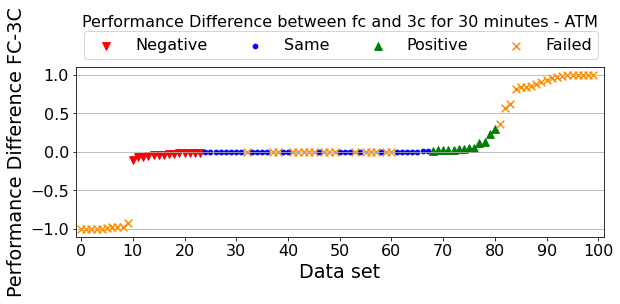

In [6]:
var1 = fig.atm[(fig.atm.methods == 'fc') & (fig.atm.time_budget==30)].sort_values(by=['dataset']).accuracy
var2 = fig.atm[(fig.atm.methods == '3c') & (fig.atm.time_budget==30)].sort_values(by=['dataset']).accuracy
fig.compare_acc_scatter(var1, var2, 'Data set', 'Performance Difference FC-3C', 'Performance Difference between fc and 3c for 30 minutes - ATM', fig_size = (9, 4))

In [7]:
fig.skout[((fig.skout.time_budget==30) & (fig.skout.methods=='fc'))]

,dataset,time_budget,methods,accuracy
362,hiva_agnostic,30,fc,0.965028
364,phprAeXmK,30,fc,0.955828
369,Amazon,30,fc,0.624000
370,wine-quality-red,30,fc,0.630000
375,eye_movements,30,fc,0.677396
...,...,...,...,...
584,phpYLeydd,30,fc,0.658426
585,schizo,30,fc,0.941312
586,shuttle,30,fc,0.999792
587,tumors_C,30,fc,0.600000


In [8]:
import researchpy as rp
s = fig.skout[((fig.skout.accuracy!=0) & (fig.skout.time_budget == 30) & ((fig.skout.methods == 'fc') ^ (fig.skout.methods == '3c')))]
rp.summary_cont(s.groupby(['time_budget', 'methods']))['accuracy'].round(3)#.to_latex(index=True)

N   Mean     SD     SE  95% Conf.  Interval
time_budget methods                                              
30          3c       99  0.867  0.139  0.014      0.839     0.895
            fc       99  0.863  0.153  0.015      0.833     0.894